In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
df = pd.read_csv("gold_price.csv")
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Date
0,272.80,271.10,183.026,181.617,288.677,287.334,1/2/2001
1,269.00,267.15,178.916,177.390,281.823,281.655,1/3/2001
2,268.75,267.10,178.869,178.352,282.538,282.049,1/4/2001
3,268.00,267.40,178.488,178.148,280.775,280.882,1/5/2001
4,268.60,268.30,178.769,178.664,282.410,282.481,1/8/2001


In [23]:

df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['Return'] = df['USD (PM)'].pct_change() * 100
df['Lagged_Return'] = df['Return'].shift()
df = df.dropna()

train = df.loc['2001-01-01':'2018-12-31']
test = df.loc['2019-01-01':'2019-12-31']


X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

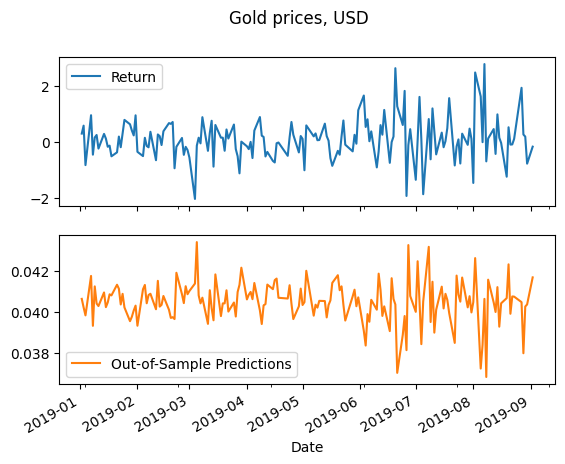

In [25]:
import matplotlib.pyplot as plt
out_of_sample_results = y_test.to_frame()
 
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')
plt.show()